In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")

import pickle

import re
import string
import urllib.request
from nltk.corpus import stopwords

In [2]:
df = pickle.load( open("tmdb4700.pkl", "rb"))

In [3]:
df.iloc[0]

id                                                          19995
title                                                      Avatar
popularity                                                150.438
vote_average                                                  7.2
vote_count                                                  11800
runtime                                                       162
release_date                                           2009-12-10
genres              [Action, Adventure, Fantasy, Science Fiction]
keywords        [culture clash, future, space war, space colon...
director                                          [James Cameron]
producer                              [James Cameron, Jon Landau]
screenplay                                        [James Cameron]
writer                                            [James Cameron]
budget                                                  237000000
profit_ratio                                              10.7636
Name: 0, d

In [4]:
genres_list     = []
keyword_list    = []
producer_list   = []
director_list   = []
writer_list     = []
screenplay_list = []


def append_to_list(in_list, target_list):
    target_list.extend(in_list)

get_genres_list     = lambda x: append_to_list(x, genres_list)
get_keyword_list    = lambda x: append_to_list(x, keyword_list)
get_producer_list   = lambda x: append_to_list(x, producer_list)
get_director_list   = lambda x: append_to_list(x, director_list)
get_writer_list     = lambda x: append_to_list(x, writer_list)
get_screenplay_list = lambda x: append_to_list(x, screenplay_list)

df.genres.apply(get_genres_list)
genres_set = set(genres_list)

df.keywords.apply(get_keyword_list)
keyword_set = set(keyword_list)

df.producer.apply(get_producer_list)
producer_set = set(keyword_list)

df.director.apply(get_director_list)
director_set = set(director_list)

df.writer.apply(get_writer_list)
writer_set = set(writer_list)

df.screenplay.apply(get_screenplay_list)
screenplay_set = set(screenplay_list)

In [7]:
len(keyword_set)

9750

In [5]:
df.keywords

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4695      [brother sister relationship, class, foot race]
4696    [gay, great britain, one-night stand, independ...
4697                          [independent film, lesbian]
4698                                     [woman director]
4699                                                   []
Name: keywords, Length: 4700, dtype: object

In [6]:
def replace_space_by_dash(x):
    aux = []
    for element in x:
        #print(element)
        element_2 = re.sub(r"\s", "_", element)
        aux.append(element_2)
    return ' '.join(aux)

do_the_replacement = lambda x: replace_space_by_dash(x)

In [7]:
replace_space_by_dash( df.keywords.iloc[0])

'culture_clash future space_war space_colony society space_travel futuristic romance space alien tribe alien_planet cgi marine soldier battle love_affair anti_war power_relations mind_and_soul 3d'

In [8]:
df["keywords_str"] = df["keywords"].apply(do_the_replacement)

In [9]:
df[["vote_average","keywords_str"]]

,vote_average,keywords_str
0,7.2,culture_clash future space_war space_colony so...
1,6.9,ocean drug_abuse exotic_island east_india_trad...
2,6.3,spy based_on_novel secret_agent sequel mi6 bri...
3,7.6,dc_comics crime_fighter terrorist secret_ident...
4,6.1,based_on_novel mars medallion space_travel pri...
...,...,...
4695,7.8,brother_sister_relationship class foot_race
4696,7.4,gay great_britain one-night_stand independent_...
4697,6.1,independent_film lesbian
4698,0.0,woman_director


In [10]:
data_cv = cv.fit_transform(df["keywords_str"])

In [11]:
data_cv

<4700x9782 sparse matrix of type '<class 'numpy.int64'>'
	with 36271 stored elements in Compressed Sparse Row format>

In [12]:
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
data_dtm

,11,15th_century,16th_century,17th_century,18th_century,1910s,1920s,1930s,1940s,1950s,...,zombie,zombie_apocalypse,zombification,zoo,zookeeper,zurich,γη,卧底肥妈,绝地奶霸,超级妈妈
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
cols = data_dtm.columns.values

In [14]:
keywords_vote_weighted = pd.DataFrame()

for i in cols:
    keywords_vote_weighted[i] = data_dtm[i] * df.vote_average

keywords_vote_weighted = keywords_vote_weighted.replace(0, np.NaN)

In [15]:
meds = keywords_vote_weighted.median()

In [19]:
meds.sort_values(ascending=False)

asperger           13.8
generation         11.6
identity_swap       8.4
mob_boss            8.4
monarch             8.4
                   ... 
pesticide           NaN
s_rights            NaN
sex_trafficking     NaN
singers             NaN
wood                NaN
Length: 9782, dtype: float64

In [18]:
keywords_vote_weighted

,11,15th_century,16th_century,17th_century,18th_century,1910s,1920s,1930s,1940s,1950s,...,zombie,zombie_apocalypse,zombification,zoo,zookeeper,zurich,γη,卧底肥妈,绝地奶霸,超级妈妈
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
keywords_vote_weighted = keywords_vote_weighted[meds.sort_values(ascending=False).index] 

KeyboardInterrupt: 

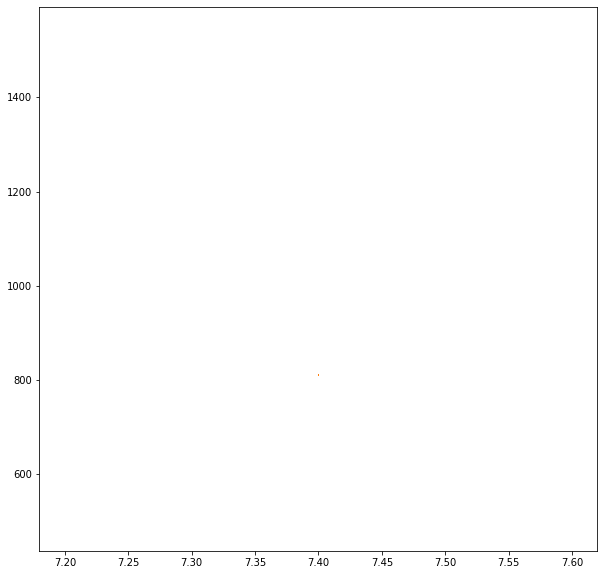

In [24]:
fig = plt.figure(figsize=(10,10,))
keywords_vote_weighted.iloc[:10].boxplot(vert=False)
plt.savefig("keywords_whole_set.png")